<h1 style="color:red;">TITLE</h1><p><strong>implement two datasets on different classifier i.e. KNN, kernel SVM, random forest, BPNN(backpropagation), Adaboost Random forest, Adaboost SVM,LSTM,ANN and XGboost. Then visualize each of its ROC curve,Confusion matrix of each classifier</strong></p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
import xgboost as xgb
from sklearn.metrics import accuracy_score

<h1><strong>WITHOUT PCA</strong></h1>


In [2]:
# Load Dataset 1
df1 = pd.read_csv('Exp_Dataset.csv')
df1

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F1016,F1017,F1018,F1019,F1020,F1021,F1022,F1023,F1024,Class
0,832.00,848.00,855.75,864.00,864.00,872.13,896.00,928.00,928.00,944.00,...,1016.00,1016.00,1000.0,976.38,944.0,936.00,919.63,935.75,906.75,Yes
1,911.88,920.13,911.00,911.75,879.75,880.00,896.00,904.00,919.75,926.00,...,825.38,847.75,880.0,848.25,832.0,856.00,880.00,889.00,864.00,Yes
2,679.00,656.00,688.00,728.00,776.00,824.25,863.88,888.00,896.00,864.25,...,1136.30,1111.60,1055.8,1016.00,1007.9,984.38,936.00,928.00,919.88,Yes
3,1032.00,1040.00,1056.00,1095.80,1056.10,1061.80,1240.40,1318.10,1350.00,1365.90,...,1526.00,1479.90,1429.4,1392.00,1381.9,1360.50,1320.00,1278.40,1264.00,Yes
4,1000.30,1008.30,1015.80,1056.30,1079.80,1080.30,992.00,1087.80,1168.30,1175.80,...,983.75,1090.30,1079.9,1064.00,1081.6,1031.50,1040.30,1041.10,1040.00,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,1208.30,1215.80,1176.00,1136.00,1216.10,1327.80,1416.10,1096.10,1056.50,1351.60,...,1158.10,1128.30,1031.6,1047.90,1066.6,1098.30,992.75,912.13,895.75,No
332,1144.10,1160.10,1167.90,1119.90,1160.40,1135.60,1120.60,1127.90,1136.00,1024.00,...,1040.00,1031.80,1080.4,1072.00,1056.1,983.63,1008.00,976.50,919.63,No
333,1144.10,1168.30,1184.00,1200.00,1208.50,1216.00,1224.00,1143.90,1088.00,1143.80,...,1192.00,1184.40,1162.0,1128.00,1120.1,1127.90,1143.90,1160.30,1168.00,No
334,848.00,856.00,872.00,903.88,920.00,888.00,880.25,976.38,1016.00,1032.00,...,1456.00,1480.10,1448.3,1472.00,1328.3,1288.50,1336.80,1256.50,1231.80,No


In [3]:
X1 = df1.drop('Class', axis=1)
y1 = df1['Class']

In [4]:
# Load Dataset 2
df2 = pd.read_csv('Expri_Dataset.csv')
df2

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,0.000286,1.519145,0.000887,1.795573,0.000060,1.035119,0.001943,2.353083,0.007488,2.506212,0.000891,1.878569,2.574750,1.922121,True
1,0.000201,1.396803,0.000802,1.506190,0.000048,0.865181,0.001421,2.245061,0.007157,2.171035,0.000734,1.679726,1.770226,2.034724,True
2,0.000245,1.505849,0.000824,1.721787,0.000055,1.001181,0.001641,2.276966,0.007108,2.400657,0.000836,1.834776,1.782286,1.746936,True
3,0.000213,1.510623,0.000759,2.028541,0.000049,0.984888,0.001457,2.341665,0.006437,2.989322,0.000662,1.861950,1.793722,2.117791,True
4,0.000251,1.542969,0.000923,2.005357,0.000068,1.021463,0.001600,2.333618,0.007113,2.846943,0.000853,1.882261,1.908964,2.109222,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,0.000348,1.375608,0.001273,1.476096,0.000055,0.919415,0.002721,2.164751,0.013226,2.003020,0.000963,1.687058,2.602816,1.893430,False
646,0.000311,1.402979,0.001194,2.121500,0.000050,0.915146,0.002416,2.232984,0.012368,3.128985,0.000854,1.680932,2.812396,2.083211,False
647,0.000184,1.270564,0.000623,1.818428,0.000032,0.780633,0.001301,2.108646,0.005800,2.828751,0.000497,1.569256,1.889279,2.239888,False
648,0.000175,1.188100,0.000568,1.403224,0.000032,0.716317,0.001271,2.052083,0.005342,2.157045,0.000518,1.489938,1.730165,1.996948,False


In [5]:
df1.shape, df2.shape

((336, 1025), (650, 15))

In [6]:
X2 = df2.drop('Class', axis=1)
y2 = df2['Class']

In [7]:
# Handle missing values with mean on dataset 1
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X1 = imputer.fit_transform(X1)


# Handle missing values with mean on dataset 2
X2 = imputer.fit_transform(X2)

In [8]:
# Convert target categorical variable to numerical on dataset 1
le = LabelEncoder()
y1 = le.fit_transform(y1)

# Convert target categorical variable to numerical on dataset 2
y2 = le.fit_transform(y2)

In [9]:
# Perform train-test split for Dataset 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Perform train-test split for Dataset 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [10]:
# Perform Min-Max scaling on dataset 1
scaler1 = MinMaxScaler()
X1_train_scaled = scaler1.fit_transform(X1)

# Perform Min-Max scaling on dataset 2
scaler2 = MinMaxScaler()
X2_train_scaled = scaler2.fit_transform(X2)


In [11]:
from sklearn.metrics import confusion_matrix, roc_auc_score

from sklearn.metrics import roc_curve, auc

def get_roc_curve(y_test, y_pred_prob):
    """
    Compute and return the ROC curve for the given predicted probabilities and true labels.

    Parameters:
    y_test (array-like of shape (n_samples,)): The true labels.
    y_pred_prob (array-like of shape (n_samples, n_classes)): The predicted probabilities.

    Returns:
    fpr (array-like of shape (n_classes,)): The false positive rate of each class.
    tpr (array-like of shape (n_classes,)): The true positive rate of each class.
    thresholds (array-like of shape (n_classes,)): The threshold of each class.
    """
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
    return fpr, tpr, thresholds

def get_auc(y_test, y_pred_prob):
    """
    Compute and return the AUC score for the given predicted probabilities and true labels.

    Parameters:
    y_test (array-like of shape (n_samples,)): The true labels.
    y_pred_prob (array-like of shape (n_samples, n_classes)): The predicted probabilities.

    Returns:
    roc_auc (float): The AUC score.
    """
    roc_auc = auc(y_test, y_pred_prob[:, 1])
    return roc_auc


In [12]:
# K-Nearest Neighbors (KNN) classifier on Dataset 1
knn1 = KNeighborsClassifier()
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X1_train, y1_train)
knn1_y1_pred = knn1.predict(X1_test)
knn1_cm = confusion_matrix(y1_test, knn1_y1_pred)
knn1_fpr, knn1_tpr, knn_thresholds = roc_curve(y1_test, knn1.predict_proba(X1_test)[:,1])
knn1_auc = auc(knn1_fpr, knn1_tpr)

In [13]:
# K-Nearest Neighbors (KNN) classifier on Dataset 2
knn2 = KNeighborsClassifier()
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X2_train, y2_train)
knn2_y2_pred = knn2.predict(X2_test)
knn2_cm = confusion_matrix(y2_test, knn2_y2_pred)
knn2_fpr, knn2_tpr, knn_thresholds = roc_curve(y2_test, knn2.predict_proba(X2_test)[:,1])
knn2_auc = auc(knn2_fpr, knn2_tpr)

In [14]:
# Support Vector Machine (SVM) classifier with a radial basis function (RBF) kernel on Dataset 1
svm_rbf1 = SVC(kernel='rbf', probability=True)
svm_rbf1.fit(X1_train, y1_train)
svm_rbf1_y_pred = svm_rbf1.predict(X1_test)
svm_rbf1_cm = confusion_matrix(y1_test, svm_rbf1_y_pred)
svm_rbf1_fpr, svm_rbf1_tpr, svm_rbf1_thresholds = roc_curve(y1_test, svm_rbf1.predict_proba(X1_test)[:,1])
svm_rbf1_auc = auc(svm_rbf1_fpr, svm_rbf1_tpr)

In [15]:
# Support Vector Machine (SVM) classifier with a radial basis function (RBF) kernel on Dataset 2
svm_rbf2 = SVC(kernel='rbf', probability=True)
svm_rbf2.fit(X2_train, y2_train)
svm_rbf2_y_pred = svm_rbf2.predict(X2_test)
svm_rbf2_cm = confusion_matrix(y2_test, svm_rbf2_y_pred)
svm_rbf2_fpr, svm_rbf2_tpr, svm_rbf2_thresholds = roc_curve(y2_test, svm_rbf2.predict_proba(X2_test)[:,1])
svm_rbf2_auc = auc(svm_rbf2_fpr, svm_rbf2_tpr)

In [16]:

# Random Forest classifier on Dataset 1
rfc1 = RandomForestClassifier(n_estimators=100, random_state=42)
rfc1.fit(X1_train, y1_train)
rfc1_y_pred = rfc1.predict(X1_test)
rfc1_cm = confusion_matrix(y1_test, rfc1_y_pred)
rfc1_fpr, rfc1_tpr, rfc1_thresholds = roc_curve(y1_test, rfc1.predict_proba(X1_test)[:,1])
rfc1_auc = auc(rfc1_fpr, rfc1_tpr)

In [17]:

# Random Forest classifier on Dataset 2
rfc2 = RandomForestClassifier(n_estimators=100, random_state=42)
rfc2.fit(X2_train, y2_train)
rfc2_y_pred = rfc2.predict(X2_test)
rfc2_cm = confusion_matrix(y2_test, rfc2_y_pred)
rfc2_fpr, rfc2_tpr, rfc2_thresholds = roc_curve(y2_test, rfc2.predict_proba(X2_test)[:,1])
rfc2_auc = auc(rfc2_fpr, rfc2_tpr)

In [18]:
# Backpropagation Neural Network (BPNN) classifier on Dataset 1
bpnn1 = MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000)
bpnn1.fit(X1_train, y1_train)
bpnn1_y_pred = bpnn1.predict(X1_test)
bpnn1_cm = confusion_matrix(y1_test, bpnn1_y_pred)
bpnn1_fpr, bpnn1_tpr, bpnn1_thresholds = roc_curve(y1_test, bpnn1.predict_proba(X1_test)[:,1])
bpnn1_auc = auc(bpnn1_fpr, bpnn1_tpr)

In [19]:
# Backpropagation Neural Network (BPNN) classifier on Dataset 2
bpnn2 = MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000)
bpnn2.fit(X2_train, y2_train)
bpnn2_y_pred = bpnn2.predict(X2_test)
bpnn2_cm = confusion_matrix(y2_test, bpnn2_y_pred)
bpnn2_fpr, bpnn2_tpr, bpnn2_thresholds = roc_curve(y2_test, bpnn2.predict_proba(X2_test)[:,1])
bpnn2_auc = auc(bpnn2_fpr, bpnn2_tpr)

In [20]:
# Implement and train ANN Classifier on Dataset 1
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X1_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

ann1 = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32)
ann1.fit(X1_train, y1_train)

<ipython-input-20-216c90e2faa5>:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann1 = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32)


Epoch 1/10
9/9 [==============================] - 2s 6ms/step - loss: 302.4114 - accuracy: 0.7761
Epoch 2/10
9/9 [==============================] - 0s 6ms/step - loss: 175.0165 - accuracy: 0.6754
Epoch 3/10
9/9 [==============================] - 0s 6ms/step - loss: 183.5665 - accuracy: 0.8881
Epoch 4/10
9/9 [==============================] - 0s 6ms/step - loss: 69.0679 - accuracy: 0.7575
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 70.6191 - accuracy: 0.7910
Epoch 6/10
9/9 [==============================] - 0s 8ms/step - loss: 39.7819 - accuracy: 0.8881
Epoch 7/10
9/9 [==============================] - 0s 11ms/step - loss: 26.2530 - accuracy: 0.7090
Epoch 8/10
9/9 [==============================] - 0s 12ms/step - loss: 10.8064 - accuracy: 0.8321
Epoch 9/10
9/9 [==============================] - 0s 13ms/step - loss: 36.1488 - accuracy: 0.8097
Epoch 10/10
9/9 [==============================] - 0s 11ms/step - loss: 47.0842 - accuracy: 0.7985


In [21]:
# make predictions on validation dataset
y_pred = ann1.predict(X1_test)

# calculate false positive rate, true positive rate and thresholds
ann1_fpr, ann1_tpr, ann1_thresholds = roc_curve(y1_test, y_pred)

# calculate area under the curve (AUC)
ann1_auc = auc(ann1_fpr, ann1_tpr)


3/3 [==============================] - 0s 10ms/step


In [22]:
# Implement and train ANN Classifier on Dataset 2
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X2_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

ann2 = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32)
ann2.fit(X2_train, y2_train)

<ipython-input-22-0a7a3b47ed8e>:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann2 = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32)


Epoch 1/10
17/17 [==============================] - 4s 9ms/step - loss: 0.6047 - accuracy: 0.6942
Epoch 2/10
17/17 [==============================] - 0s 11ms/step - loss: 0.5619 - accuracy: 0.7558
Epoch 3/10
17/17 [==============================] - 0s 11ms/step - loss: 0.5574 - accuracy: 0.7558
Epoch 4/10
17/17 [==============================] - 0s 14ms/step - loss: 0.5583 - accuracy: 0.7558
Epoch 5/10
17/17 [==============================] - 0s 8ms/step - loss: 0.5540 - accuracy: 0.7558
Epoch 6/10
17/17 [==============================] - 0s 12ms/step - loss: 0.5557 - accuracy: 0.7558
Epoch 7/10
17/17 [==============================] - 0s 6ms/step - loss: 0.5523 - accuracy: 0.7558
Epoch 8/10
17/17 [==============================] - 0s 6ms/step - loss: 0.5523 - accuracy: 0.7558
Epoch 9/10
17/17 [==============================] - 0s 4ms/step - loss: 0.5487 - accuracy: 0.7558
Epoch 10/10
17/17 [==============================] - 0s 4ms/step - loss: 0.5485 - accuracy: 0.7558


In [23]:
# make predictions on validation dataset
y_pred = ann2.predict(X2_test)

# calculate false positive rate, true positive rate and thresholds
ann2_fpr, ann2_tpr, ann2_thresholds = roc_curve(y2_test, y_pred)

# calculate area under the curve (AUC)
ann2_auc = auc(ann2_fpr, ann2_tpr)


5/5 [==============================] - 0s 5ms/step


In [24]:
# Define the LSTM model
model1 = Sequential()
model1.add(Embedding(5000, 128))
model1.add(LSTM(128))
model1.add(Dense(1, activation='sigmoid'))

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model1.fit(X1_train, y1_train, epochs=10, batch_size=32, verbose=1)


# Evaluate the model on the test data
score1, accuracy = model1.evaluate(X1_test, y1_test, batch_size=32, verbose=0)
print('Test loss:', score1)
print('Test accuracy:', accuracy)

Epoch 1/10
9/9 [==============================] - 29s 2s/step - loss: 0.6102 - accuracy: 0.8694
Epoch 2/10
9/9 [==============================] - 17s 2s/step - loss: 0.3817 - accuracy: 0.8881
Epoch 3/10
9/9 [==============================] - 17s 2s/step - loss: 0.3367 - accuracy: 0.8881
Epoch 4/10
9/9 [==============================] - 16s 2s/step - loss: 0.3285 - accuracy: 0.8881
Epoch 5/10
9/9 [==============================] - 17s 2s/step - loss: 0.3131 - accuracy: 0.8881
Epoch 6/10
9/9 [==============================] - 17s 2s/step - loss: 0.2904 - accuracy: 0.8881
Epoch 7/10
9/9 [==============================] - 17s 2s/step - loss: 0.2497 - accuracy: 0.8881
Epoch 8/10
9/9 [==============================] - 17s 2s/step - loss: 0.1803 - accuracy: 0.8955
Epoch 9/10
9/9 [==============================] - 20s 2s/step - loss: 0.1132 - accuracy: 0.9627
Epoch 10/10
9/9 [==============================] - 16s 2s/step - loss: 0.0752 - accuracy: 0.9739
Test loss: 0.7816140651702881
Test accu

In [25]:
# Compute the false positive rate, true positive rate, and threshold values for the ROC curve

predictions = (model1.predict(X1_test) > 0.5).astype("int32")

model1_fpr, model1_tpr, model1_thresholds = roc_curve(y1_test, predictions)
model1_auc = auc(model1_fpr, model1_tpr)

3/3 [==============================] - 2s 290ms/step


In [26]:
# Define the LSTM model
model2 = Sequential()
model2.add(Embedding(5000, 128))
model2.add(LSTM(128))
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model2.fit(X2_train, y2_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test data
score2, accuracy = model1.evaluate(X2_test, y2_test, batch_size=32, verbose=0)
print('Test loss:', score2)
print('Test accuracy:', accuracy)

Epoch 1/10
17/17 [==============================] - 3s 35ms/step - loss: 0.6068 - accuracy: 0.7423
Epoch 2/10
17/17 [==============================] - 1s 40ms/step - loss: 0.5619 - accuracy: 0.7558
Epoch 3/10
17/17 [==============================] - 1s 39ms/step - loss: 0.5552 - accuracy: 0.7558
Epoch 4/10
17/17 [==============================] - 1s 35ms/step - loss: 0.5586 - accuracy: 0.7558
Epoch 5/10
17/17 [==============================] - 1s 38ms/step - loss: 0.5550 - accuracy: 0.7558
Epoch 6/10
17/17 [==============================] - 1s 40ms/step - loss: 0.5591 - accuracy: 0.7558
Epoch 7/10
17/17 [==============================] - 1s 34ms/step - loss: 0.5546 - accuracy: 0.7558
Epoch 8/10
17/17 [==============================] - 1s 39ms/step - loss: 0.5523 - accuracy: 0.7558
Epoch 9/10
17/17 [==============================] - 1s 67ms/step - loss: 0.5568 - accuracy: 0.7558
Epoch 10/10
17/17 [==============================] - 1s 62ms/step - loss: 0.5488 - accuracy: 0.7558
Test loss

In [27]:
predictions = (model2.predict(X2_test) > 0.5).astype("int32")

model2_fpr, model2_tpr, model2_thresholds = roc_curve(y2_test, predictions)
model2_auc = auc(model2_fpr, model2_tpr)

5/5 [==============================] - 0s 9ms/step


In [28]:

# Initialize Adaboost Random Forest classifier
rf = RandomForestClassifier(n_estimators=10, random_state=42)
ada_rf1 = AdaBoostClassifier(base_estimator=rf, n_estimators=50, random_state=42)

# Fit Adaboost Random Forest classifier on dataset 1
ada_rf1.fit(X1_train, y1_train)

# Predict probabilities for Adaboost Random Forest classifier on dataset 1
y1_pred_ada_rf1 = ada_rf1.predict_proba(X1_test)[:, 1]

# Calculate ROC curve for Adaboost Random Forest classifier on dataset 1
fpr_ada_rf1, tpr_ada_rf1, thresholds_ada_rf1 = roc_curve(y1_test, y1_pred_ada_rf1)

# Calculate AUC score for Adaboost Random Forest classifier on dataset 1
auc_ada_rf1 = roc_auc_score(y1_test, y1_pred_ada_rf1)

# Calculate confusion matrix for Adaboost Random Forest classifier on dataset 1
y1_pred_ada_rf1 = np.where(y1_pred_ada_rf1 > 0.5, 1, 0)
cm_ada_rf1 = confusion_matrix(y1_test, y1_pred_ada_rf1)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [29]:
# Initialize Adaboost Random Forest classifier
rf = RandomForestClassifier(n_estimators=10, random_state=42)
ada_rf2 = AdaBoostClassifier(base_estimator=rf, n_estimators=50, random_state=42)

# Fit Adaboost Random Forest classifier on dataset 2
ada_rf2.fit(X2_train, y2_train)

# Predict probabilities for Adaboost Random Forest classifier on dataset 2
y2_pred_ada_rf2 = ada_rf2.predict_proba(X2_test)[:, 1]

# Calculate ROC curve for Adaboost Random Forest classifier on dataset 2
fpr_ada_rf2, tpr_ada_rf2, thresholds_ada_rf2 = roc_curve(y2_test, y2_pred_ada_rf2)

# Calculate AUC score for Adaboost Random Forest classifier on dataset 2
auc_ada_rf2 = roc_auc_score(y2_test, y2_pred_ada_rf2)

# Calculate confusion matrix for Adaboost Random Forest classifier on dataset 2
y2_pred_ada_rf2 = np.where(y2_pred_ada_rf2 > 0.5, 1, 0)
cm_ada_rf2 = confusion_matrix(y2_test, y2_pred_ada_rf2)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [30]:
# Initialize Adaboost SVM classifier
svm = SVC(kernel='linear', probability=True, random_state=42)
ada_svm1 = AdaBoostClassifier(base_estimator=svm, n_estimators=50, random_state=42)

# Fit Adaboost SVM classifier on dataset 1
ada_svm1.fit(X1_train, y1_train)

# Predict probabilities for Adaboost SVM classifier on dataset 1
y1_pred_ada_svm1 = ada_svm1.predict_proba(X1_test)[:, 1]

# Calculate ROC curve for Adaboost SVM classifier on dataset 1
fpr_ada_svm1, tpr_ada_svm1, thresholds_ada_svm1 = roc_curve(y1_test, y1_pred_ada_svm1)

# Calculate AUC score for Adaboost SVM classifier on dataset 1
auc_ada_svm1 = roc_auc_score(y1_test, y1_pred_ada_svm1)

# Calculate confusion matrix for Adaboost SVM classifier on dataset 1
y1_pred_ada_svm1 = np.where(y1_pred_ada_svm1 > 0.5, 1, 0)
cm_ada_svm1 = confusion_matrix(y1_test, y1_pred_ada_svm1)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [31]:
# Initialize Adaboost SVM classifier
svm = SVC(kernel='linear', probability=True, random_state=42)
ada_svm2 = AdaBoostClassifier(base_estimator=svm, n_estimators=50, random_state=42)

# Fit Adaboost SVM classifier on dataset 2
ada_svm2.fit(X2_train, y2_train)

# Predict probabilities for Adaboost SVM classifier on dataset 2
y2_pred_ada_svm2 = ada_svm2.predict_proba(X2_test)[:, 1]

# Calculate ROC curve for Adaboost SVM classifier on dataset 2
fpr_ada_svm2, tpr_ada_svm2, thresholds_ada_svm2 = roc_curve(y2_test, y2_pred_ada_svm2)

# Calculate AUC score for Adaboost SVM classifier on dataset 2
auc_ada_svm2 = roc_auc_score(y2_test, y2_pred_ada_svm2)

# Calculate confusion matrix for Adaboost SVM classifier on dataset 2
y2_pred_ada_svm2 = np.where(y2_pred_ada_svm2 > 0.5, 1, 0)
cm_ada_svm2 = confusion_matrix(y2_test, y2_pred_ada_svm2)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [32]:
# XGBoost classifier dataset 1
xgb_model1 = xgb.XGBClassifier(random_state=42)

# Fitting the model
xgb_model1.fit(X1_train, y1_train)

# Predicting on test set
y1_pred = xgb_model1.predict(X1_test)

# Evaluating the model
print("Confusion Matrix for Dataset 1:\n", confusion_matrix(y1_test, y1_pred))
print("ROC AUC Score for Dataset 1:\n", roc_auc_score(y1_test, y1_pred))


Confusion Matrix for Dataset 1:
 [[ 0 10]
 [ 1 57]]
ROC AUC Score for Dataset 1:
 0.49137931034482757


In [33]:
# make predictions on validation dataset
y_pred = xgb_model1.predict_proba(X1_test)[:, 1]

# calculate false positive rate, true positive rate and thresholds
xgb_model1_fpr, xgb_model1_tpr, xgb_model1_thresholds = roc_curve(y1_test, y_pred)

# calculate area under the curve (AUC)
xgb_model1_auc = auc(xgb_model1_fpr, xgb_model1_tpr)

In [34]:
# XGBoost classifier on dataset 2
xgb_model2 = xgb.XGBClassifier(random_state=42)

# Fitting the model
xgb_model2.fit(X2_train, y2_train)

# Predicting on test set
y2_pred = xgb_model2.predict(X2_test)

# Evaluating the model
print("Confusion Matrix for Dataset 1:\n", confusion_matrix(y2_test, y2_pred))
print("ROC AUC Score for Dataset 1:\n", roc_auc_score(y2_test, y2_pred))

Confusion Matrix for Dataset 1:
 [[82  8]
 [32  8]]
ROC AUC Score for Dataset 1:
 0.5555555555555555


In [35]:
# make predictions on validation dataset
y_pred = xgb_model2.predict_proba(X2_test)[:, 1]

# calculate false positive rate, true positive rate and thresholds
xgb_model2_fpr, xgb_model2_tpr, xgb_model2_thresholds = roc_curve(y2_test, y_pred)

# calculate area under the curve (AUC)
xgb_model2_auc = auc(xgb_model2_fpr, xgb_model2_tpr)

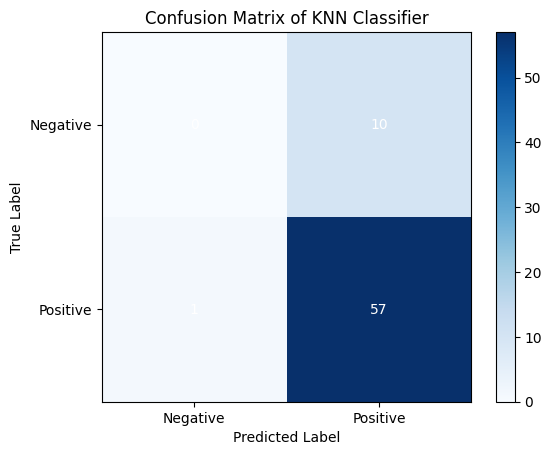

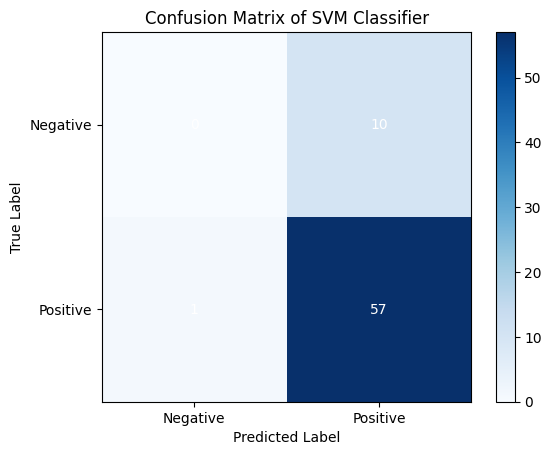

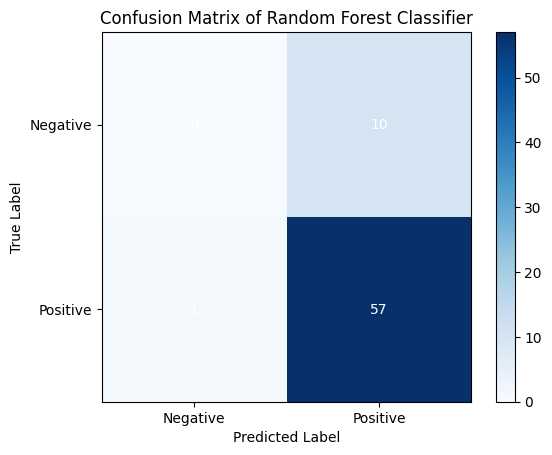

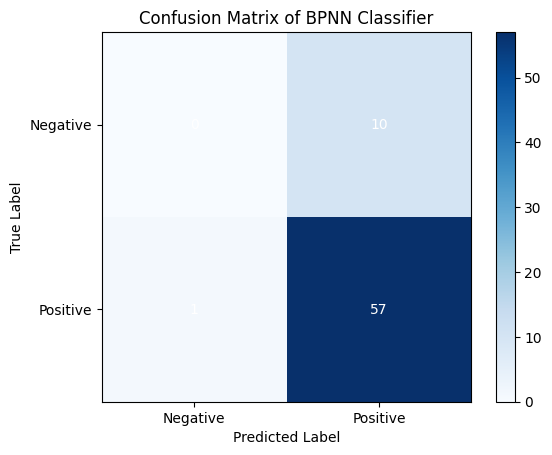

3/3 [==============================] - 0s 6ms/step


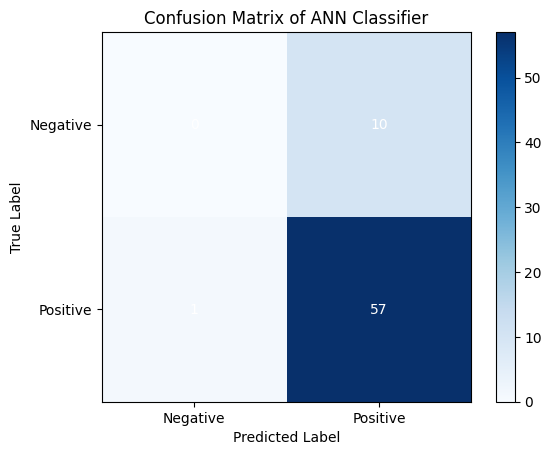

3/3 [==============================] - 2s 528ms/step


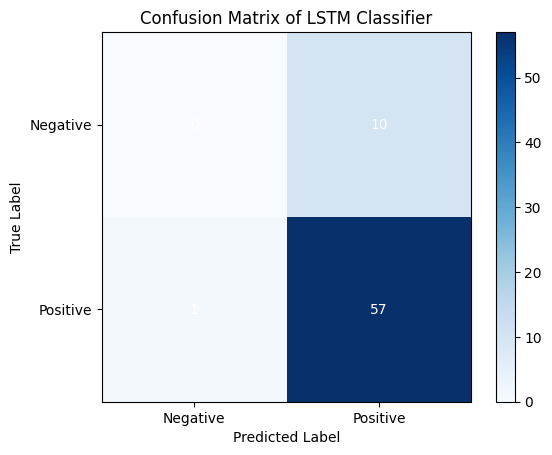

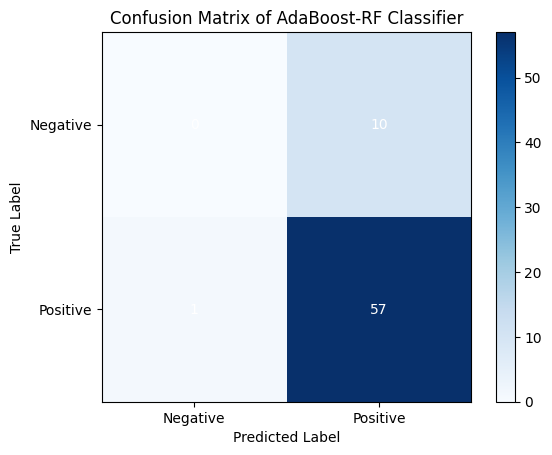

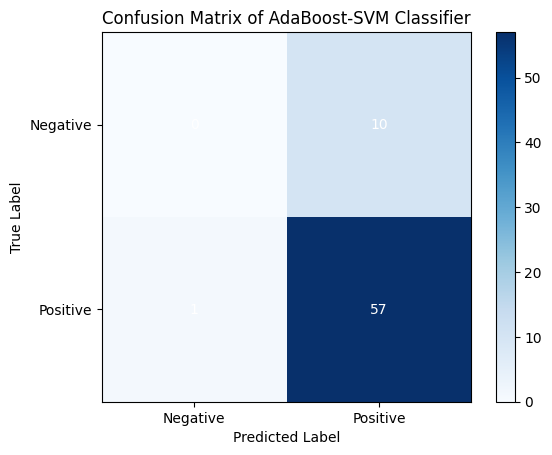

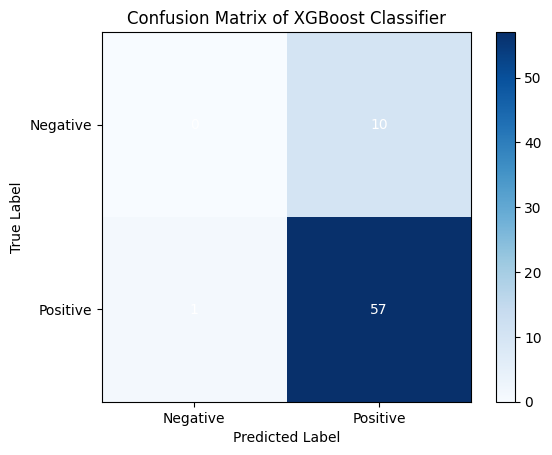

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming that you have trained and tested the following classifiers:
# knn, svm, rf, bpnn, ann, lstm, adaboost_rf, adaboost_svm, and xgboost for Dataset 1

# Define a list of classifiers and their corresponding predicted labels
classifiers = [knn1, svm_rbf1, rfc1, bpnn1, ann1, model1, ada_rf1, ada_svm1, xgb_model1]
labels = ['KNN', 'SVM', 'Random Forest', 'BPNN', 'ANN', 'LSTM', 'AdaBoost-RF', 'AdaBoost-SVM', 'XGBoost']

# Plot the confusion matrix for each classifier
for clf, label in zip(classifiers, labels):
    y_pred = clf.predict(X1_test)
    cm = confusion_matrix(y1_test, y1_pred)
    plt.figure()
    plt.imshow(cm, cmap='Blues')
    plt.title('Confusion Matrix of {} Classifier'.format(label))
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks([0, 1], ['Negative', 'Positive'])
    plt.yticks([0, 1], ['Negative', 'Positive'])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white')
    plt.show()


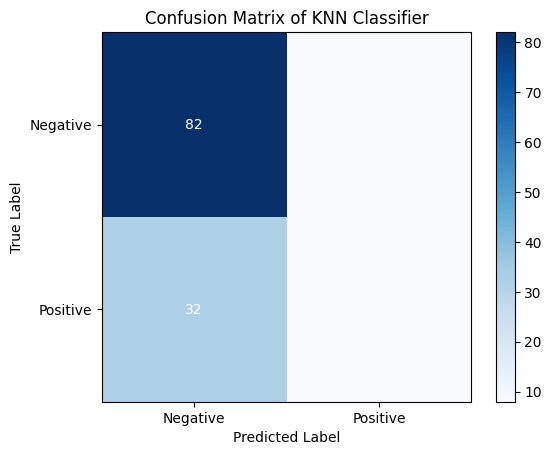

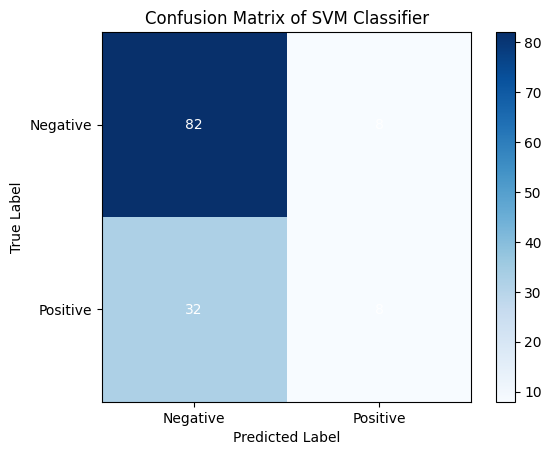

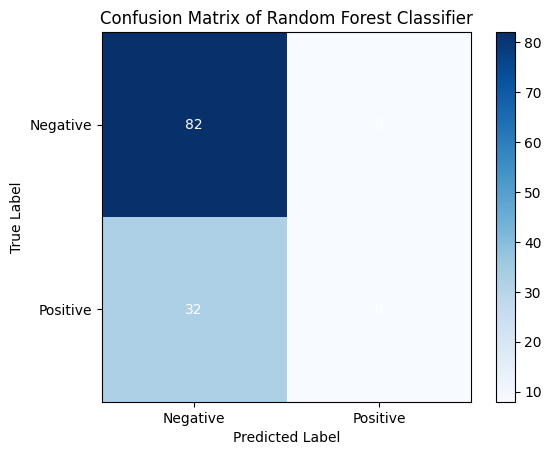

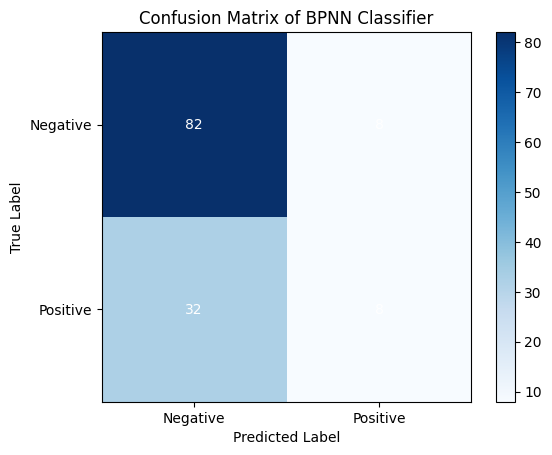

5/5 [==============================] - 0s 4ms/step


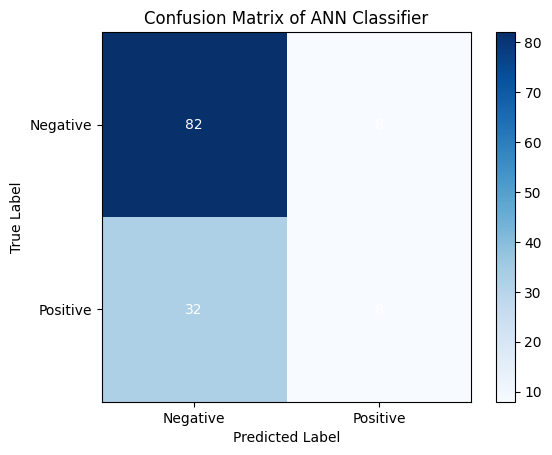

5/5 [==============================] - 0s 12ms/step


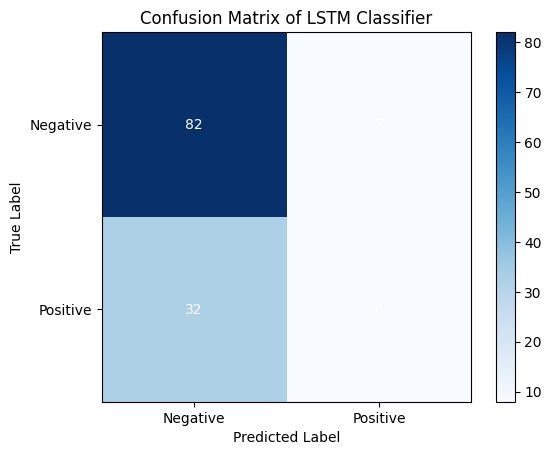

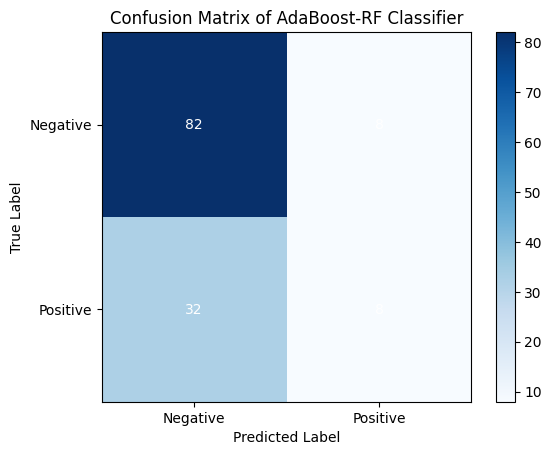

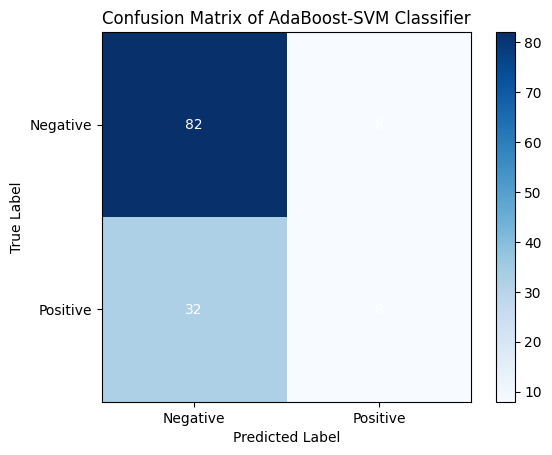

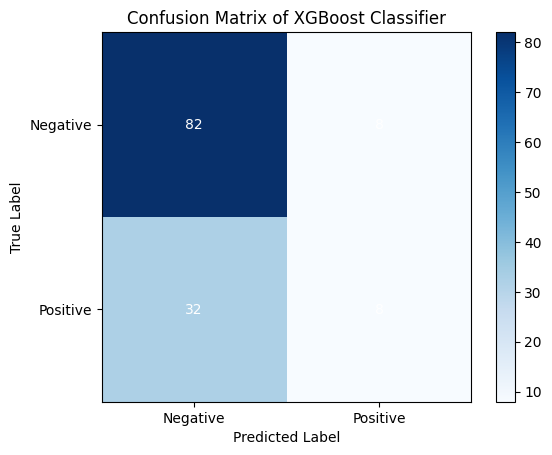

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming that you have trained and tested the following classifiers:
# knn, svm, rf, bpnn, ann, lstm, adaboost_rf, adaboost_svm, and xgboost for Dataset 2

# Define a list of classifiers and their corresponding predicted labels
classifiers = [knn2, svm_rbf2, rfc2, bpnn2, ann2, model2, ada_rf2, ada_svm2, xgb_model2]
labels = ['KNN', 'SVM', 'Random Forest', 'BPNN', 'ANN', 'LSTM', 'AdaBoost-RF', 'AdaBoost-SVM', 'XGBoost']

# Plot the confusion matrix for each classifier
for clf, label in zip(classifiers, labels):
    y_pred = clf.predict(X2_test)
    cm = confusion_matrix(y2_test, y2_pred)
    plt.figure()
    plt.imshow(cm, cmap='Blues')
    plt.title('Confusion Matrix of {} Classifier'.format(label))
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks([0, 1], ['Negative', 'Positive'])
    plt.yticks([0, 1], ['Negative', 'Positive'])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white')
    plt.show()


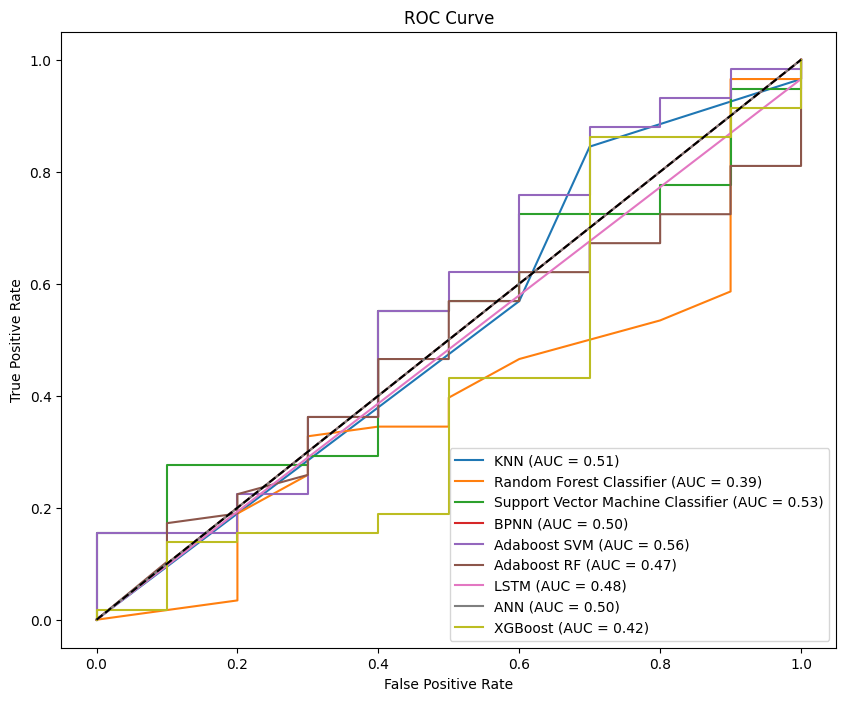

In [38]:
plt.figure(figsize=(10, 8))
plt.plot(knn1_fpr, knn1_tpr, label='KNN (AUC = %0.2f)' % knn1_auc)
plt.plot(rfc1_fpr, rfc1_tpr, label='Random Forest Classifier (AUC = %0.2f)' % rfc1_auc)
plt.plot(svm_rbf1_fpr, svm_rbf1_tpr, label='Support Vector Machine Classifier (AUC = %0.2f)' % svm_rbf1_auc)
plt.plot(bpnn1_fpr, bpnn1_tpr, label='BPNN (AUC = %0.2f)' % bpnn1_auc)
plt.plot(fpr_ada_svm1, tpr_ada_svm1, label='Adaboost SVM (AUC = %0.2f)' % auc_ada_svm1)
plt.plot(fpr_ada_rf1, tpr_ada_rf1, label='Adaboost RF (AUC = %0.2f)' % auc_ada_rf1)
plt.plot(model1_fpr, model1_tpr, label='LSTM (AUC = %0.2f)' % model1_auc)
plt.plot(ann1_fpr, ann1_tpr, label='ANN (AUC = %0.2f)' % ann1_auc)
plt.plot(xgb_model1_fpr, xgb_model1_tpr, label='XGBoost (AUC = %0.2f)' % xgb_model1_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

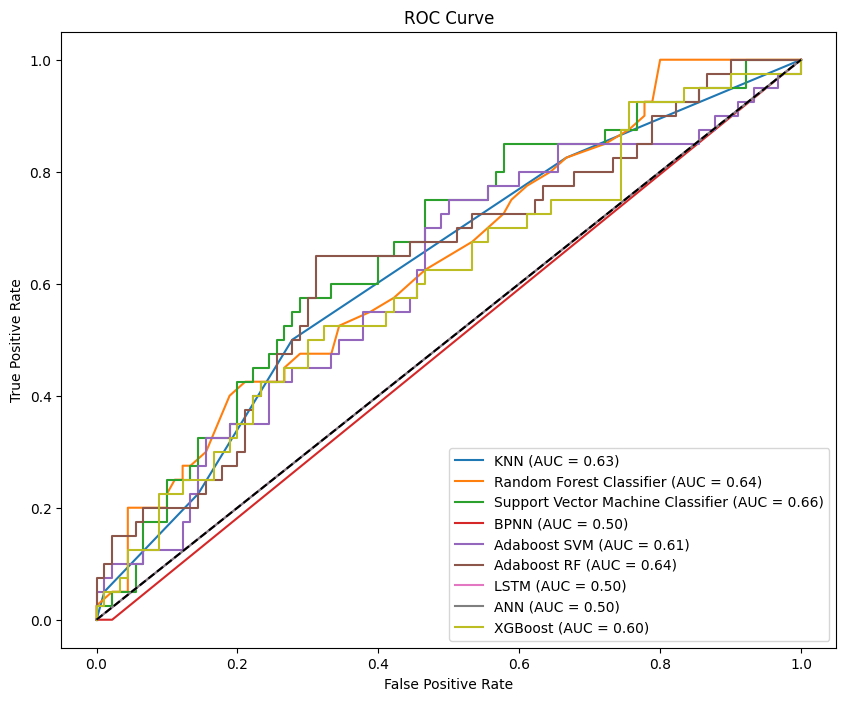

In [39]:
plt.figure(figsize=(10, 8))
plt.plot(knn2_fpr, knn2_tpr, label='KNN (AUC = %0.2f)' % knn2_auc)
plt.plot(rfc2_fpr, rfc2_tpr, label='Random Forest Classifier (AUC = %0.2f)' % rfc2_auc)
plt.plot(svm_rbf2_fpr, svm_rbf2_tpr, label='Support Vector Machine Classifier (AUC = %0.2f)' % svm_rbf2_auc)
plt.plot(bpnn2_fpr, bpnn2_tpr, label='BPNN (AUC = %0.2f)' % bpnn1_auc)
plt.plot(fpr_ada_svm2, tpr_ada_svm2, label='Adaboost SVM (AUC = %0.2f)' % auc_ada_svm2)
plt.plot(fpr_ada_rf2, tpr_ada_rf2, label='Adaboost RF (AUC = %0.2f)' % auc_ada_rf2)
plt.plot(model2_fpr, model2_tpr, label='LSTM (AUC = %0.2f)' % model2_auc)
plt.plot(ann2_fpr, ann2_tpr, label='ANN (AUC = %0.2f)' % ann2_auc)
plt.plot(xgb_model2_fpr, xgb_model2_tpr, label='XGBoost (AUC = %0.2f)' % xgb_model2_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

<h1><STRONG> WITH PCA<STRONG></h1>

In [40]:
# Perform train-test split for Dataset 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Perform train-test split for Dataset 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


In [41]:
# Apply PCA to reduce the dimensionality of the dataset 1
pca = PCA(n_components=2)
X1_train_pca = pca.fit_transform(X1_train)
X1_test_pca = pca.transform(X1_test)

# Apply PCA to reduce the dimensionality of the dataset 2
pca = PCA(n_components=2)
X2_train_pca = pca.fit_transform(X2_train)
X2_test_pca = pca.transform(X2_test)

In [42]:
# Train the KNN classifier dataset 1
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X1_train_pca, y1_train)

# Predict the labels for the testing set dataset 1
y1_pred = knn.predict(X1_test_pca)

# Evaluate the performance of the classifier dataset 1
accuracy = accuracy_score(y1_test, y1_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8382352941176471


In [43]:
# Train the KNN classifier dataset 2
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X2_train_pca, y2_train)

# Predict the labels for the testing set dataset 2
y2_pred = knn.predict(X2_test_pca)

# Evaluate the performance of the classifier dataset 2
accuracy = accuracy_score(y2_test, y2_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6692307692307692


In [44]:

# Train the Kernel SVM classifier on Dataset 1
svm1 = SVC(kernel='rbf')
svm1.fit(X1_train_pca, y1_train)

# Predict the labels for the testing set on Dataset 1
y1_pred = svm1.predict(X1_test_pca)

# Evaluate the performance of the classifier on Dataset 1
accuracy = accuracy_score(y1_test, y1_pred)
print(f"Accuracy: {accuracy}")


# Train the Kernel SVM classifier on Dataset 2
svm2 = SVC(kernel='rbf')
svm2.fit(X2_train_pca, y2_train)

# Predict the labels for the testing set on Dataset 2
y2_pred = svm2.predict(X2_test_pca)

# Evaluate the performance of the classifier on Dataset 2
accuracy = accuracy_score(y2_test, y2_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8529411764705882
Accuracy: 0.6923076923076923


In [45]:
# Train the Random Forest classifier on Dataset 1
rf1 = RandomForestClassifier(n_estimators=100)
rf1.fit(X1_train_pca, y1_train)

# Predict the labels for the testing set on Dataset 1
y1_pred = rf1.predict(X1_test_pca)

# Evaluate the performance of the classifier on Dataset 1
accuracy = accuracy_score(y1_test, y1_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8382352941176471


In [46]:
# Train the Random Forest classifier on Dataset 2
rf2 = RandomForestClassifier(n_estimators=100)
rf2.fit(X2_train_pca, y2_train)

# Predict the labels for the testing set on Dataset 2
y2_pred = rf2.predict(X2_test_pca)

# Evaluate the performance of the classifier on Dataset 2
accuracy = accuracy_score(y2_test, y2_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6615384615384615


In [47]:
# Train the BPNN classifier  on Dataset 1
bpnn1 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
bpnn1.fit(X1_train_pca, y1_train)

# Predict the labels for the testing set  on Dataset 1
y1_pred = bpnn1.predict(X1_test_pca)

# Evaluate the performance of the classifier  on Dataset 1
accuracy = accuracy_score(y1_test, y1_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.75


In [48]:
# Train the BPNN classifier  on Dataset 2
bpnn2 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
bpnn2.fit(X2_train_pca, y2_train)

# Predict the labels for the testing set  on Dataset 2
y2_pred = bpnn2.predict(X2_test_pca)

# Evaluate the performance of the classifier  on Dataset 2
accuracy = accuracy_score(y2_test, y2_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6923076923076923


In [49]:
# Train the Adaboost Random Forest classifier on Dataset 1
rf1 = RandomForestClassifier(n_estimators=100)
ab_rf1 = AdaBoostClassifier(base_estimator=rf1, n_estimators=100)
ab_rf1.fit(X1_train_pca, y1_train)

# Predict the labels for the testing set on Dataset 1
y1_pred = ab_rf1.predict(X1_test_pca)

# Evaluate the performance of the classifier on Dataset 1
accuracy = accuracy_score(y1_test, y1_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8382352941176471


In [50]:
# Train the Adaboost Random Forest classifier on Dataset 2
rf2 = RandomForestClassifier(n_estimators=100)
ab_rf2 = AdaBoostClassifier(base_estimator=rf2, n_estimators=100)
ab_rf2.fit(X2_train_pca, y2_train)

# Predict the labels for the testing set on Dataset 2
y2_pred = ab_rf2.predict(X2_test_pca)

# Evaluate the performance of the classifier on Dataset 2
accuracy = accuracy_score(y2_test, y2_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.6692307692307692


In [51]:
# Train the Adaboost SVM classifier on Dataset 1
svc1 = SVC(probability=True, kernel='linear')
ab_svc1 = AdaBoostClassifier(base_estimator=svc1, n_estimators=50)
ab_svc1.fit(X1_train_pca, y1_train)

# Predict the labels for the testing set on Dataset 1
y1_pred = ab_svc1.predict(X1_test_pca)

# Evaluate the performance of the classifier on Dataset 1
accuracy = accuracy_score(y1_test, y1_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8529411764705882


In [52]:
# Train the Adaboost SVM classifier on Dataset 2
svc2 = SVC(probability=True, kernel='linear')
ab_svc2 = AdaBoostClassifier(base_estimator=svc2, n_estimators=50)
ab_svc2.fit(X2_train_pca, y2_train)

# Predict the labels for the testing set on Dataset 2
y2_pred = ab_svc2.predict(X2_test_pca)

# Evaluate the performance of the classifier on Dataset 2
accuracy = accuracy_score(y2_test, y2_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.6923076923076923


In [55]:
import tensorflow as tf

# Apply PCA to reduce the dimensionality of the dataset 1
pca = PCA(n_components=50)
X1_train_pca = pca.fit_transform(X1_train)
X1_test_pca = pca.transform(X1_test)

model1 = Sequential()
model1.add(Embedding(5000, 128))
model1.add(LSTM(128))
model1.add(Dense(1, activation='sigmoid'))

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model1.fit(X1_train, y1_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
9/9 [==============================] - 35s 3s/step - loss: 0.6318 - accuracy: 0.8358
Epoch 2/10
9/9 [==============================] - 17s 2s/step - loss: 0.4149 - accuracy: 0.8881
Epoch 3/10
9/9 [==============================] - 18s 2s/step - loss: 0.3711 - accuracy: 0.8881
Epoch 4/10
9/9 [==============================] - 17s 2s/step - loss: 0.3329 - accuracy: 0.8881
Epoch 5/10
9/9 [==============================] - 18s 2s/step - loss: 0.3184 - accuracy: 0.8881
Epoch 6/10
9/9 [==============================] - 18s 2s/step - loss: 0.2967 - accuracy: 0.8881
Epoch 7/10
9/9 [==============================] - 17s 2s/step - loss: 0.2637 - accuracy: 0.8881
Epoch 8/10
9/9 [==============================] - 17s 2s/step - loss: 0.2124 - accuracy: 0.8955
Epoch 9/10
9/9 [==============================] - 18s 2s/step - loss: 0.1353 - accuracy: 0.9328
Epoch 10/10
9/9 [==============================] - 17s 2s/step - loss: 0.0792 - accuracy: 0.9664


In [56]:
# Evaluate the model on the test data
score1, accuracy = model1.evaluate(X1_test, y1_test, batch_size=32, verbose=0)
print('Test loss:', score1)
print('Test accuracy:', accuracy)

Test loss: 0.7639222145080566
Test accuracy: 0.8529411554336548


In [59]:
#  Apply PCA to reduce the dimensionality of the dataset 2
pca = PCA(n_components=5)
X2_train_pca = pca.fit_transform(X2_train)
X2_test_pca = pca.transform(X2_test)

model2 = Sequential()
model2.add(Embedding(5000, 128))
model2.add(LSTM(128))
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model2.fit(X2_train, y2_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test data
score2, accuracy = model2.evaluate(X2_test, y2_test, batch_size=32, verbose=0)
print('Test loss:', score2)
print('Test accuracy:', accuracy)


Epoch 1/10
17/17 [==============================] - 7s 80ms/step - loss: 0.5946 - accuracy: 0.7365
Epoch 2/10
17/17 [==============================] - 1s 74ms/step - loss: 0.5579 - accuracy: 0.7558
Epoch 3/10
17/17 [==============================] - 1s 66ms/step - loss: 0.5547 - accuracy: 0.7558
Epoch 4/10
17/17 [==============================] - 1s 59ms/step - loss: 0.5554 - accuracy: 0.7558
Epoch 5/10
17/17 [==============================] - 1s 65ms/step - loss: 0.5524 - accuracy: 0.7558
Epoch 6/10
17/17 [==============================] - 2s 90ms/step - loss: 0.5538 - accuracy: 0.7558
Epoch 7/10
17/17 [==============================] - 1s 44ms/step - loss: 0.5662 - accuracy: 0.7558
Epoch 8/10
17/17 [==============================] - 1s 41ms/step - loss: 0.5516 - accuracy: 0.7558
Epoch 9/10
17/17 [==============================] - 1s 41ms/step - loss: 0.5538 - accuracy: 0.7558
Epoch 10/10
17/17 [==============================] - 1s 40ms/step - loss: 0.5489 - accuracy: 0.7558
Test loss

In [60]:
# PCA for Dataset 1
n_components = 5
pca = PCA(n_components=n_components)
X1_train_pca = pca.fit_transform(X1_train)
X1_test_pca = pca.transform(X1_test)

# Perform train-test split for Dataset 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_train_pca, y1_train, test_size=0.2, random_state=42)


# Create the first model for the digits dataset
model1 = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=100)
model1.fit(X1_train, y1_train)

score1 = model1.score(X1_test, y1_test)
print('Test score:', score1)

Test score: 0.9259259259259259


In [61]:
# PCA for Dataset 2
n_components = 5
pca = PCA(n_components=n_components)
X2_train_pca = pca.fit_transform(X2_train)
X2_test_pca = pca.transform(X2_test)

# Perform train-test split for Dataset 1
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_train_pca, y2_train, test_size=0.2, random_state=42)


# Create the first model for the digits dataset
model2 = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=100)
model2.fit(X1_train, y1_train)

score2 = model1.score(X2_test, y2_test)
print('Test score:', score2)

Test score: 0.41346153846153844


In [62]:
# Create the second model for the  dataset 1
model1 = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100)
model1.fit(X1_train, y1_train)

# Create the second model for the  dataset 2
model2 = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100)
model2.fit(X1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [63]:
# Evaluate the first model
score1 = model1.score(X1_test, y1_test)
print('Test score:', score1)

# Evaluate the second model
score2 = model2.score(X1_test, y1_test)
print('Test score:', score2)

Test score: 0.9074074074074074
Test score: 0.9074074074074074


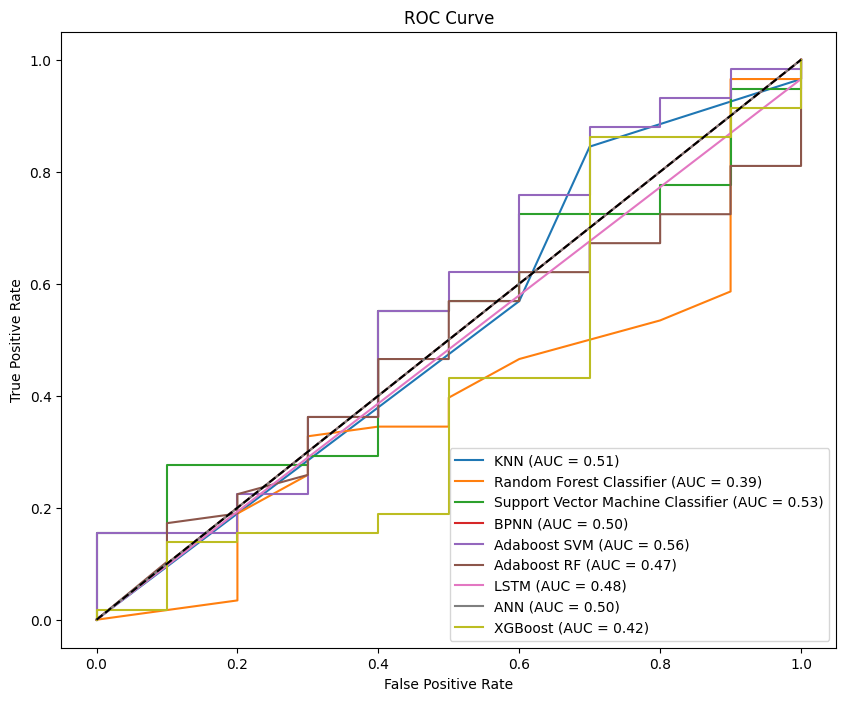

In [66]:
plt.figure(figsize=(10, 8))
plt.plot(knn1_fpr, knn1_tpr, label='KNN (AUC = %0.2f)' % knn1_auc)
plt.plot(rfc1_fpr, rfc1_tpr, label='Random Forest Classifier (AUC = %0.2f)' % rfc1_auc)
plt.plot(svm_rbf1_fpr, svm_rbf1_tpr, label='Support Vector Machine Classifier (AUC = %0.2f)' % svm_rbf1_auc)
plt.plot(bpnn1_fpr, bpnn1_tpr, label='BPNN (AUC = %0.2f)' % bpnn1_auc)
plt.plot(fpr_ada_svm1, tpr_ada_svm1, label='Adaboost SVM (AUC = %0.2f)' % auc_ada_svm1)
plt.plot(fpr_ada_rf1, tpr_ada_rf1, label='Adaboost RF (AUC = %0.2f)' % auc_ada_rf1)
plt.plot(model1_fpr, model1_tpr, label='LSTM (AUC = %0.2f)' % model1_auc)
plt.plot(ann1_fpr, ann1_tpr, label='ANN (AUC = %0.2f)' % ann1_auc)
plt.plot(xgb_model1_fpr, xgb_model1_tpr, label='XGBoost (AUC = %0.2f)' % xgb_model1_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

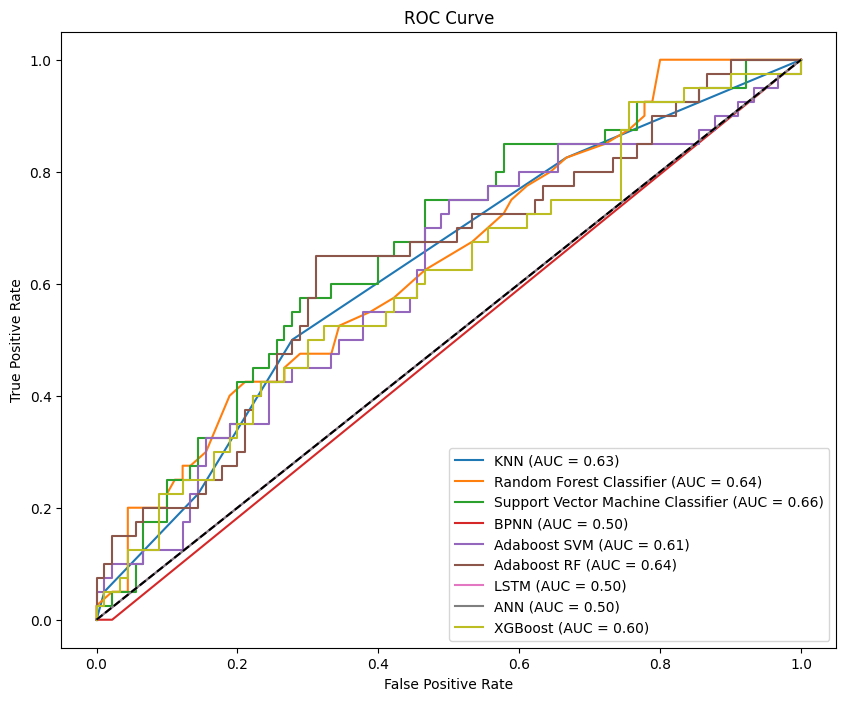

In [67]:
plt.figure(figsize=(10, 8))
plt.plot(knn2_fpr, knn2_tpr, label='KNN (AUC = %0.2f)' % knn2_auc)
plt.plot(rfc2_fpr, rfc2_tpr, label='Random Forest Classifier (AUC = %0.2f)' % rfc2_auc)
plt.plot(svm_rbf2_fpr, svm_rbf2_tpr, label='Support Vector Machine Classifier (AUC = %0.2f)' % svm_rbf2_auc)
plt.plot(bpnn2_fpr, bpnn2_tpr, label='BPNN (AUC = %0.2f)' % bpnn1_auc)
plt.plot(fpr_ada_svm2, tpr_ada_svm2, label='Adaboost SVM (AUC = %0.2f)' % auc_ada_svm2)
plt.plot(fpr_ada_rf2, tpr_ada_rf2, label='Adaboost RF (AUC = %0.2f)' % auc_ada_rf2)
plt.plot(model2_fpr, model2_tpr, label='LSTM (AUC = %0.2f)' % model2_auc)
plt.plot(ann2_fpr, ann2_tpr, label='ANN (AUC = %0.2f)' % ann2_auc)
plt.plot(xgb_model2_fpr, xgb_model2_tpr, label='XGBoost (AUC = %0.2f)' % xgb_model2_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()